In [13]:
import numpy as np
import os
import pandas as pd
from glob import glob
from os.path import basename

In [14]:
data_dir = "C:/Users/USER/Desktop/Gesture Data"

In [15]:
# Load training data
train_df = pd.read_csv("Train(static)_NoKal.csv")  
# Load testing data
test_df = pd.read_csv("New Data(concat)\Than_NoKal.csv")  

# Separate features (X) and target variable (y) for training data
X_train = train_df.drop(columns=['Gesture', 'Time'])
y_train = train_df['Gesture']

# Separate features (X) and target variable (y) for testing data
X_test = test_df.drop(columns=['Gesture', 'Time'])
y_test = test_df['Gesture']

In [16]:
from micromlgen import port
from sklearn.svm import SVC

X = X_train
y = y_train
model = SVC(kernel='linear', gamma=0.001, probability=True)
model.fit(X, y)
print(port(model, classmap={
    0: 'Backward',
    1: 'Down',
    2: 'Forward',
    3: 'Left',
    4: 'Right',
    5: 'Up',
 }))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class SVM {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        float kernels[241] = { 0 };
                        float decisions[15] = { 0 };
                        int votes[6] = { 0 };
                        kernels[0] = compute_kernel(x,   12.87  , -2.74  , -9.64  , 11.78  , 1.01  , -9.62  , 14.4  , -3.66  , -9.47  , 14.44  , 0.91  , -10.49 );
                        kernels[1] = compute_kernel(x,   12.88  , -2.65  , -9.62  , 11.89  , 0.99  , -9.68  , 14.47  , -3.84  , -9.42  , 14.19  , 0.79  , -10.57 );
                        kernels[2] = compute_kernel(x,   12.82  , -2.7  , -9.59  , 11.86  , 0.97  , -9.71  , 14.49  , -3.77  , -9.17  , 14.05  , 0.76  , -10.62 );
                        kernels[3] = compute_kernel(x,   12.86  , -

In [17]:
print(model.predict_log_proba(X_test)[0])

[-2.68452822e-05 -1.22470318e+01 -1.28542347e+01 -1.23059924e+01
 -1.11572837e+01 -1.42695828e+01]


In [18]:
model.predict(X_test)

array(['Backward', 'Backward', 'Backward', ..., 'Up', 'Up', 'Up'],
      dtype=object)

In [19]:
# Evaluate the model on the testing data
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Accuracy: 1.0
Confusion Matrix:
[[2000    0    0    0    0    0]
 [   0 2000    0    0    0    0]
 [   0    0 2000    0    0    0]
 [   0    0    0 2000    0    0]
 [   0    0    0    0 2000    0]
 [   0    0    0    0    0 2000]]


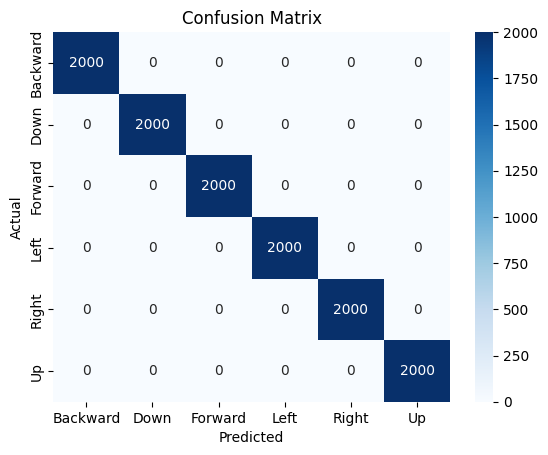

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique class labels
class_labels = sorted(set(y_test))

# Plot the confusion matrix with actual labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()